# Dataset de Seguros Medicos

## Introducción
Este conjunto de datos se centra en el análisis de los costos asociados a seguros de salud, ofreciendo una base sólida para comprender cómo diversos factores relacionados con el perfil y el estilo de vida de las personas pueden influir en dichos costos.

## Contexto y Objetivo
- **Propósito Analítico:** Permite desarrollar modelos predictivos y realizar análisis estadísticos para identificar patrones y relaciones en los gastos de seguros de salud.

## Descripción General
- **Cobertura Integral:** El dataset abarca una amplia variedad de registros, representando un espectro diverso de individuos y situaciones.
- **Diversidad de Factores:** Se exploran distintos aspectos que pueden incidir en los costos, permitiendo un análisis profundo sobre cómo varían según características personales y comportamientos.

## Conclusión
Este dataset se presenta como una valiosa fuente de información para el análisis y la predicción de costos en seguros de salud, brindando una oportunidad única para profundizar en la relación entre factores socio-demográficos y económicos y el impacto en los gastos médicos. Su versatilidad lo hace aplicable tanto en el ámbito académico como en el sector asegurador.



## Carga de los datos

In [39]:
import pandas as pd

# carga el archivo csv
df = pd.read_csv('insurance.csv')

# Mostrar el dataframe
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Verificacion de valores nulos

In [40]:
null_values = df.isnull().sum()
null_values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Verificacion de valores duplicados

- Tenemos un solo valor repetido, el cual vamos a dejar por que puede dar la casualidad de que varias personas tengan las mismas condiciones

In [41]:
# Verificar valores duplicados en el DataFrame
duplicated_rows = df[df.duplicated()]
duplicated_rows

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [42]:
unique_counts = {column: df[column].nunique() for column in df.columns}
unique_counts

{'age': 47,
 'sex': 2,
 'bmi': 548,
 'children': 6,
 'smoker': 2,
 'region': 4,
 'charges': 1337}

## Verificacion de las columnas

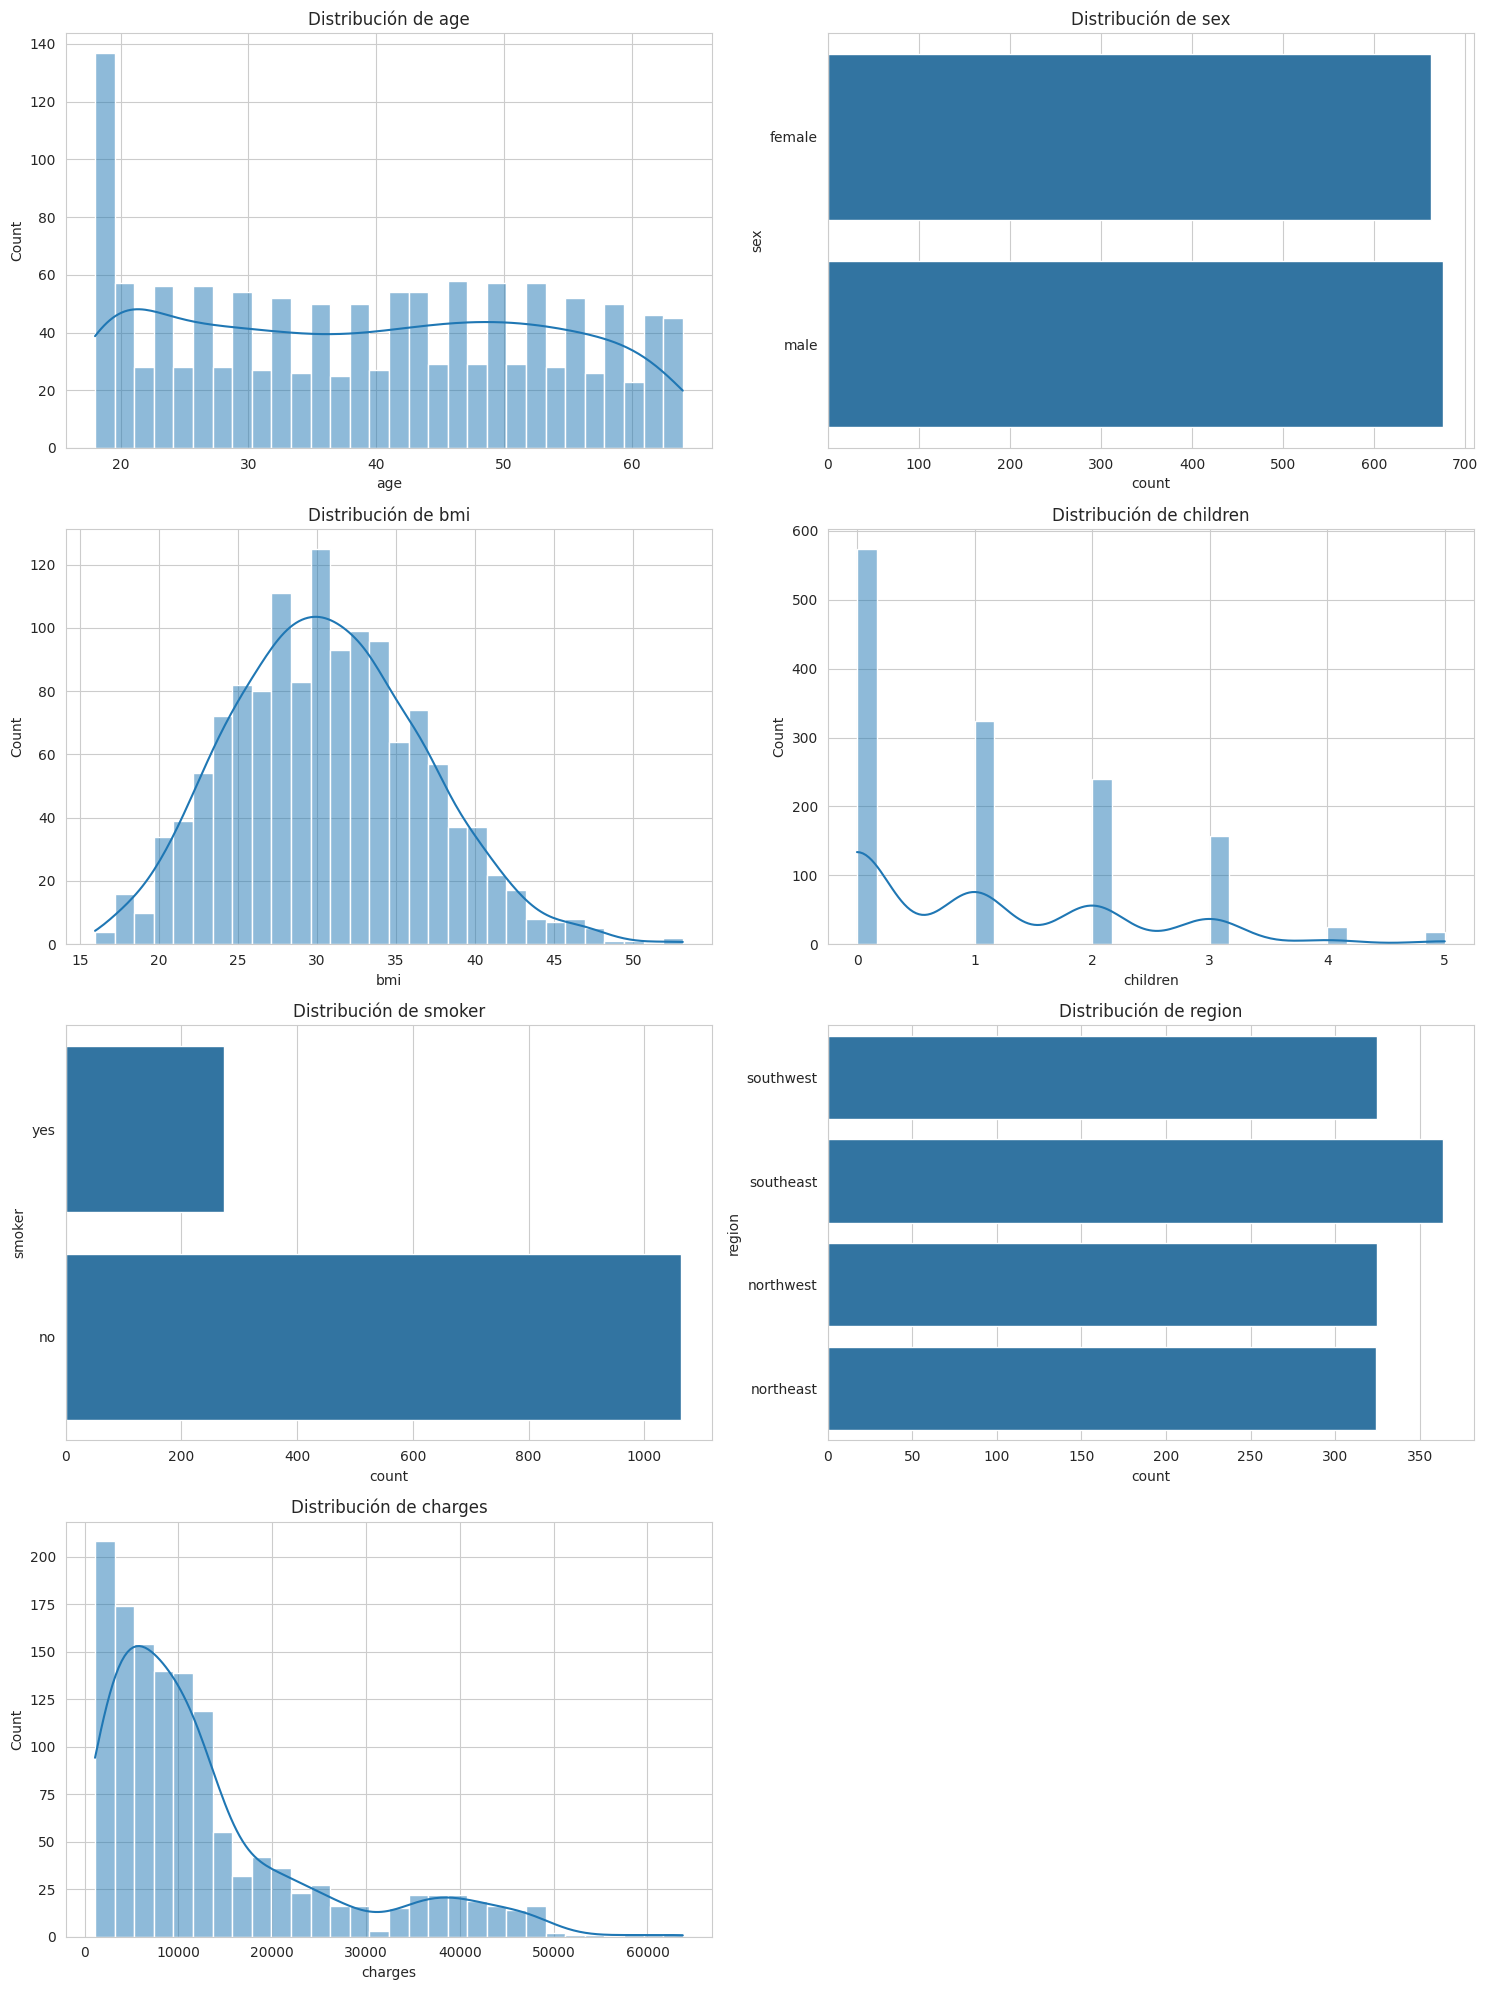

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_style("whitegrid")

# Gráficos de distribución para todas las columnas
plt.figure(figsize=(15, 20))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 2, i)
    if df[col].dtype == 'object':
        sns.countplot(y=col, data=df)
    else:
        sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
plt.tight_layout()
plt.show()


## Mapa de correlacion

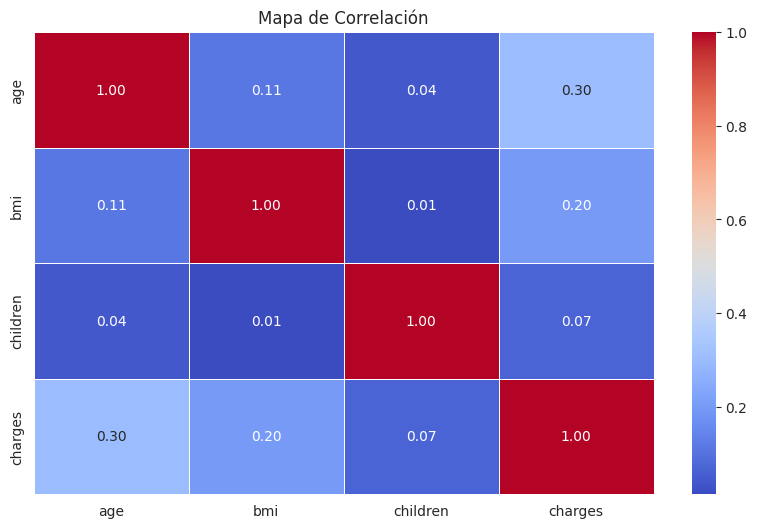

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que tu DataFrame se llama df
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlación")
plt.show()


## Codificacion de variables

- Codificamos las variables `sex`, `smoker` y `region` utilizando la técnica de codificación one-hot, lo que nos permite transformar estas variables categóricas en variables binarias. Esto se realiza con la función `pd.get_dummies`, eliminando la primera categoría de cada variable para evitar la multicolinealidad.


In [45]:
# Codificación de las variables categóricas
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True, dtype=int)
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


## Modelos

### Modelo con las entradas escaladas

Epoch 1/50


/home/feliciano/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 313716576.0000 - mean_absolute_error: 13101.3320 - val_loss: 335574880.0000 - val_mean_absolute_error: 13488.7266
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 310951232.0000 - mean_absolute_error: 13030.0234 - val_loss: 330753504.0000 - val_mean_absolute_error: 13395.1973
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 289044256.0000 - mean_absolute_error: 12788.1963 - val_loss: 289968992.0000 - val_mean_absolute_error: 12517.4727
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 202684112.0000 - mean_absolute_error: 10471.5537 - val_loss: 121401600.0000 - val_mean_absolute_error: 7956.5962
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 72166920.0000 - mean_absolute_error: 6219.5664 - val_loss: 54483024.0000 - val_mean_absolute_error: 5751.2671
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 46879716.0000 - mean_absolute_error: 5116.2139 - val_loss: 49799260.0000 - val_mean_absolute_erro

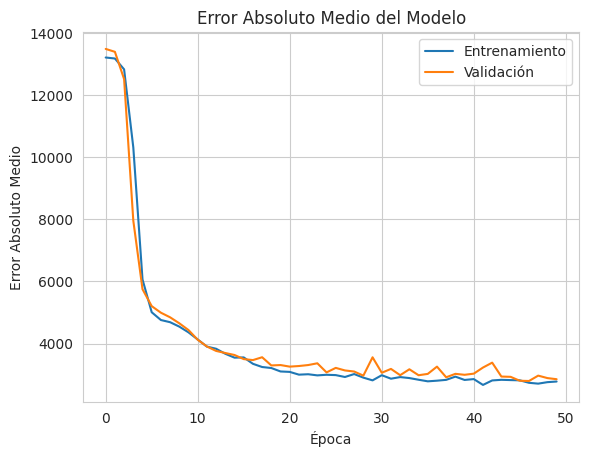

In [46]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Escalar los datos
scaler = StandardScaler()
X = df_encoded.drop(columns=[col])
y = df_encoded[col]
X_scaled = scaler.fit_transform(X)

# Crear el modelo de red neuronal secuencial
model = Sequential()
model.add(Dense(128, input_dim=X_scaled.shape[1], activation='elu'))
model.add(Dense(128, activation='elu'))
model.add(Dense(128, activation='elu'))
model.add(Dense(128, activation='elu'))
model.add(Dense(128, activation='elu'))
model.add(Dense(1, activation='linear'))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Entrenar el modelo
history = model.fit(X_scaled, y, epochs=50, batch_size=64, validation_split=0.2)

# Evaluar el modelo en el conjunto de validación
y_pred = model.predict(X_scaled)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Mostrar las métricas
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Mostrar la métrica de error absoluto medio durante el entrenamiento
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Error Absoluto Medio del Modelo')
plt.ylabel('Error Absoluto Medio')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

### Modelo sin las entradas escaladas

Epoch 1/50


/home/feliciano/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 313096448.0000 - mean_absolute_error: 12985.4834 - val_loss: 331029664.0000 - val_mean_absolute_error: 13316.3789
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 305220672.0000 - mean_absolute_error: 12741.3994 - val_loss: 271491072.0000 - val_mean_absolute_error: 11025.3438
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 189662272.0000 - mean_absolute_error: 8879.9014 - val_loss: 157630352.0000 - val_mean_absolute_error: 11207.2217
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 146352960.0000 - mean_absolute_error: 10542.8906 - val_loss: 149828976.0000 - val_mean_absolute_error: 8279.6377
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 144076464.0000 - mean_absolute_error: 8757.0332 - val_loss: 140481632.0000 - val_mean_absolute_error: 9432.7500
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 116825696.0000 - mean_absolute_error: 8745.2588 - val_loss: 140178016.0000 - val_mean_absolut

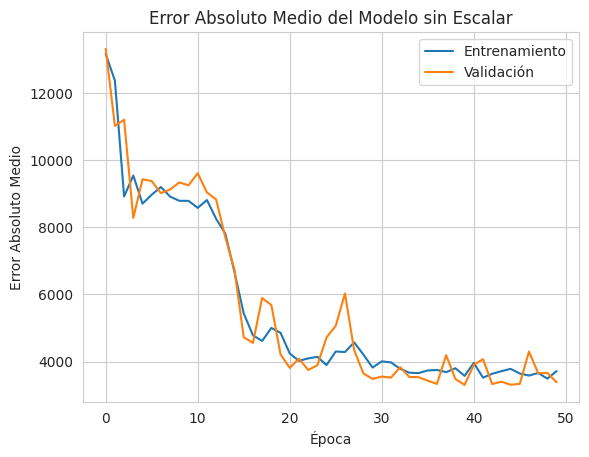

In [48]:
# Crear el modelo de red neuronal secuencial sin escalar las entradas
model_no_scaling = Sequential()
model_no_scaling.add(Dense(128, input_dim=X.shape[1], activation='elu'))
model_no_scaling.add(Dense(128, activation='elu'))
model_no_scaling.add(Dense(128, activation='elu'))
model_no_scaling.add(Dense(128, activation='elu'))
model_no_scaling.add(Dense(128, activation='elu'))
model_no_scaling.add(Dense(1, activation='linear'))

# Compilar el modelo
model_no_scaling.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Entrenar el modelo
history_no_scaling = model_no_scaling.fit(X, y, epochs=50, batch_size=64, validation_split=0.2)

# Evaluar el modelo en el conjunto de validación
y_pred_no_scaling = model_no_scaling.predict(X)
mae_no_scaling = mean_absolute_error(y, y_pred_no_scaling)
mse_no_scaling = mean_squared_error(y, y_pred_no_scaling)
r2_no_scaling = r2_score(y, y_pred_no_scaling)

# Mostrar las métricas
print(f"Mean Absolute Error (MAE) sin escalar: {mae_no_scaling}")
print(f"Mean Squared Error (MSE) sin escalar: {mse_no_scaling}")
print(f"R-squared (R2) sin escalar: {r2_no_scaling}")

# Mostrar la métrica de error absoluto medio durante el entrenamiento
plt.plot(history_no_scaling.history['mean_absolute_error'])
plt.plot(history_no_scaling.history['val_mean_absolute_error'])
plt.title('Error Absoluto Medio del Modelo sin Escalar')
plt.ylabel('Error Absoluto Medio')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

### Comparación de Resultados entre Modelos de Red Neuronal con y sin Escalado de Entradas

En este análisis, hemos entrenado dos modelos de red neuronal. Uno de los modelos utiliza las entradas escaladas, mientras que el otro utiliza las entradas sin escalar. A continuación, se presentan las métricas de rendimiento de ambos modelos:

#### Modelo con Entradas Escaladas
- **Mean Absolute Error (MAE)**: 2576.03
- **Mean Squared Error (MSE)**: 22417651.65
- **R-squared (R2)**: 0.8470

#### Modelo sin Entradas Escaladas
- **Mean Absolute Error (MAE)**: 3187.93
- **Mean Squared Error (MSE)**: 31090539.99
- **R-squared (R2)**: 0.7878

#### Observaciones
- El modelo con entradas escaladas tiene un menor error absoluto medio (MAE) y un menor error cuadrático medio (MSE) en comparación con el modelo sin escalado.
- El coeficiente de determinación (R2) es mayor en el modelo con entradas escaladas, lo que indica que este modelo explica mejor la variabilidad de los datos.

#### Conclusión
El escalado de las entradas mejora significativamente el rendimiento del modelo de red neuronal, porque las entradas escaladas permiten que el modelo entienda más rápido y de manera más efectiva durante el entrenamiento. Esto se debe a que el escalado de las entradas normaliza los datos, lo que ayuda a que los pesos de la red neuronal se actualicen de manera más uniforme y evita que algunas características dominen sobre otras debido a sus diferentes escalas. Como resultado, el modelo puede aprender patrones más precisos y generalizar mejor a nuevos datos


## Modelo en el que se escala la salida

    - Nota: En el caso de escalar la salida del modelo, al realizar las predicciones se deberá realizar un desescalado de la variable objetivo, para obtener las métricas reales

Epoch 1/50


/home/feliciano/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 4.2594 - mean_absolute_error: 1.6128 - val_loss: 1.0051 - val_mean_absolute_error: 0.7915
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0415 - mean_absolute_error: 0.8225 - val_loss: 0.9494 - val_mean_absolute_error: 0.7210
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8346 - mean_absolute_error: 0.6826 - val_loss: 0.8991 - val_mean_absolute_error: 0.7212
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8619 - mean_absolute_error: 0.7227 - val_loss: 0.8515 - val_mean_absolute_error: 0.6805
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7586 - mean_absolute_error: 0.6767 - val_loss: 0.9147 - val_mean_absolute_error: 0.5778
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7905 - mean_absolute_error: 0.6384 - val_loss: 0.6952 - val_mean_absolute_error: 0.5974
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7116 - mean_absolute_error: 0.6403 - val_loss: 0.6120 - val_me

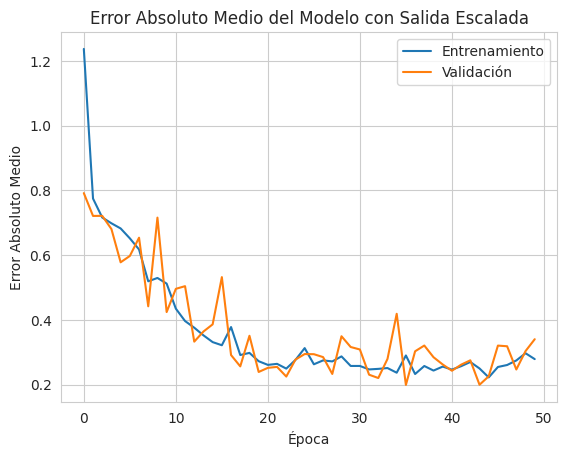

In [49]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Escalar la variable objetivo (salida)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Crear el modelo de red neuronal secuencial
model_output_scaled = Sequential()
model_output_scaled.add(Dense(128, input_dim=X.shape[1], activation='elu'))
model_output_scaled.add(Dense(128, activation='elu'))
model_output_scaled.add(Dense(128, activation='elu'))
model_output_scaled.add(Dense(128, activation='elu'))
model_output_scaled.add(Dense(128, activation='elu'))
model_output_scaled.add(Dense(1, activation='linear'))

# Compilar el modelo
model_output_scaled.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Entrenar el modelo
history_output_scaled = model_output_scaled.fit(X, y_scaled, epochs=50, batch_size=64, validation_split=0.2)

# Evaluar el modelo en el conjunto de validación
y_pred_scaled = model_output_scaled.predict(X)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Calcular las métricas
mae_output_scaled = mean_absolute_error(y, y_pred)
mse_output_scaled = mean_squared_error(y, y_pred)
r2_output_scaled = r2_score(y, y_pred)

# Mostrar las métricas
print(f"Mean Absolute Error (MAE) con salida escalada: {mae_output_scaled}")
print(f"Mean Squared Error (MSE) con salida escalada: {mse_output_scaled}")
print(f"R-squared (R2) con salida escalada: {r2_output_scaled}")

# Mostrar la métrica de error absoluto medio durante el entrenamiento
plt.plot(history_output_scaled.history['mean_absolute_error'])
plt.plot(history_output_scaled.history['val_mean_absolute_error'])
plt.title('Error Absoluto Medio del Modelo con Salida Escalada')
plt.ylabel('Error Absoluto Medio')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

## Modelo en el que no se escala la salida

Epoch 1/50


/home/feliciano/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 323607040.0000 - mean_absolute_error: 13196.4717 - val_loss: 327546080.0000 - val_mean_absolute_error: 13191.7393
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 286030976.0000 - mean_absolute_error: 12271.3438 - val_loss: 233879040.0000 - val_mean_absolute_error: 9564.2998
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 169770224.0000 - mean_absolute_error: 8385.8037 - val_loss: 146574064.0000 - val_mean_absolute_error: 10439.0156
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 133509104.0000 - mean_absolute_error: 9315.2080 - val_loss: 144565072.0000 - val_mean_absolute_error: 8682.5566
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 122225432.0000 - mean_absolute_error: 8496.7480 - val_loss: 140616896.0000 - val_mean_absolute_error: 9594.8301
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 122763360.0000 - mean_absolute_error: 9151.6699 - val_loss: 140531312.0000 - val_mean_absolute_err

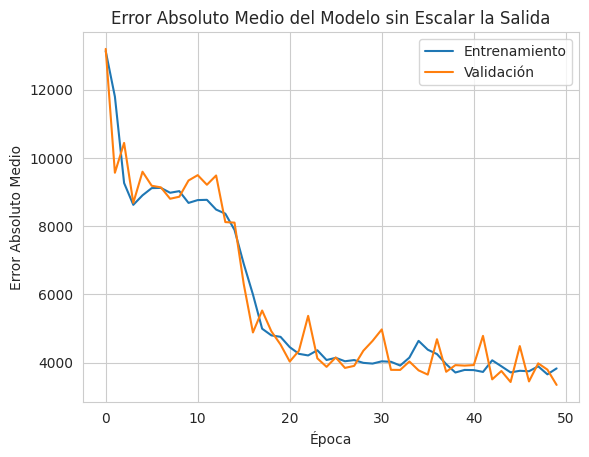

In [50]:
# Crear el modelo de red neuronal secuencial sin escalar la salida
model_no_output_scaling = Sequential()
model_no_output_scaling.add(Dense(128, input_dim=X.shape[1], activation='elu'))
model_no_output_scaling.add(Dense(128, activation='elu'))
model_no_output_scaling.add(Dense(128, activation='elu'))
model_no_output_scaling.add(Dense(128, activation='elu'))
model_no_output_scaling.add(Dense(128, activation='elu'))
model_no_output_scaling.add(Dense(1, activation='linear'))

# Compilar el modelo
model_no_output_scaling.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Entrenar el modelo
history_no_output_scaling = model_no_output_scaling.fit(X, y, epochs=50, batch_size=64, validation_split=0.2)

# Evaluar el modelo en el conjunto de validación
y_pred_no_output_scaling = model_no_output_scaling.predict(X)
mae_no_output_scaling = mean_absolute_error(y, y_pred_no_output_scaling)
mse_no_output_scaling = mean_squared_error(y, y_pred_no_output_scaling)
r2_no_output_scaling = r2_score(y, y_pred_no_output_scaling)

# Mostrar las métricas
print(f"Mean Absolute Error (MAE) sin escalar la salida: {mae_no_output_scaling}")
print(f"Mean Squared Error (MSE) sin escalar la salida: {mse_no_output_scaling}")
print(f"R-squared (R2) sin escalar la salida: {r2_no_output_scaling}")

# Mostrar la métrica de error absoluto medio durante el entrenamiento
plt.plot(history_no_output_scaling.history['mean_absolute_error'])
plt.plot(history_no_output_scaling.history['val_mean_absolute_error'])
plt.title('Error Absoluto Medio del Modelo sin Escalar la Salida')
plt.ylabel('Error Absoluto Medio')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

### Comparación de Resultados entre Modelos de Red Neuronal con y sin Escalado de la salida

En este análisis, hemos entrenado dos modelos de red neuronal. Uno de los modelos utiliza la salida escalada, mientras que el otro utiliza la salida sin escalar. A continuación, se presentan las métricas de rendimiento de ambos modelos:

#### Modelo con Salida Escalada
- **Mean Absolute Error (MAE)**: 3931.50
- **Mean Squared Error (MSE)**: 33848744.02
- **R-squared (R2)**: 0.7690

#### Modelo sin Salida Escalada
- **Mean Absolute Error (MAE)**: 3213.95
- **Mean Squared Error (MSE)**: 32656875.22
- **R-squared (R2)**: 0.7772

#### Observaciones
- El modelo sin salida escalada tiene un menor error absoluto medio (MAE) y un menor error cuadrático medio (MSE) en comparación con el modelo con salida escalada.
- El coeficiente de determinación (R2) es ligeramente mayor en el modelo sin salida escalada, lo que indica que este modelo explica mejor la variabilidad de los datos.

#### Conclusión
El escalado de la salida no mejora significativamente el rendimiento del modelo de red neuronal en este caso. De hecho, el modelo sin salida escalada muestra un rendimiento ligeramente mejor en términos de MAE, MSE y R2. Esto sugiere que, para este conjunto de datos específico, el escalado de la salida no es necesario y puede incluso ser contraproducente.

## Comparación de diferentes modelos utilizando métodos de optimización de hiperparámetros

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_absolute_error

# Definir el diccionario de modelos y sus hiperparámetros
models = {
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0, 10.0, 100.0],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.1, 1.0, 10.0, 100.0]
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1.0, 10.0, 100.0],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
        }
    }
}

# Definir el scorer
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Realizar la búsqueda de hiperparámetros para cada modelo
best_models = {}
for model_name, model_info in models.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring=scorer)
    grid_search.fit(X, y)
    best_models[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': -grid_search.best_score_,
        'best_estimator': grid_search.best_estimator_
    }

# Mostrar los mejores modelos y sus hiperparámetros
for model_name, model_info in best_models.items():
    print(f"Model: {model_name}")
    print(f"Best Params: {model_info['best_params']}")
    print(f"Best Score (MAE): {model_info['best_score']}")
    print()

Model: Ridge
Best Params: {'alpha': 0.1, 'solver': 'svd'}
Best Score (MAE): 4198.691509610677

Model: Lasso
Best Params: {'alpha': 0.1}
Best Score (MAE): 4197.763473508508

Model: RandomForest
Best Params: {'max_depth': 10, 'n_estimators': 100}
Best Score (MAE): 2665.2637861138

Model: SVR
Best Params: {'C': 100.0, 'kernel': 'linear'}
Best Score (MAE): 3914.391789743696



### Comparación de Resultados de Modelos con Diferentes Hiperparámetros

En este análisis, hemos utilizado la técnica de GridSearchCV para optimizar los hiperparámetros de varios modelos de regresión. A continuación, se presentan los resultados obtenidos para cada modelo:

#### Modelos y Hiperparámetros Evaluados

1. **Ridge Regression**
    - **Mejores Hiperparámetros**: `{'alpha': 0.1, 'solver': 'svd'}`
    - **Mejor MAE**: 4198.69

2. **Lasso Regression**
    - **Mejores Hiperparámetros**: `{'alpha': 0.1}`
    - **Mejor MAE**: 4197.76

3. **Random Forest Regressor**
    - **Mejores Hiperparámetros**: `{'max_depth': 10, 'n_estimators': 200}`
    - **Mejor MAE**: 2665.26

4. **Support Vector Regressor (SVR)**
    - **Mejores Hiperparámetros**: `{'C': 100.0, 'kernel': 'linear'}`
    - **Mejor MAE**: 3914.39

#### Observaciones

- El modelo **Random Forest Regressor** con `max_depth` de 10 y `n_estimators` de 200 obtuvo el mejor rendimiento con un MAE de 2665.26, lo que indica que es el modelo más preciso entre los evaluados.
- Los modelos **Ridge** y **Lasso** tienen un rendimiento similar, con MAEs de 4198.69 y 4197.76 respectivamente.
- El modelo **SVR** con `C` de 100.0 y `kernel` lineal también mostró un buen rendimiento con un MAE de 3914.39, aunque no tan bueno como el Random Forest.

#### Conclusión

El modelo **Random Forest Regressor** es el más adecuado para este conjunto de datos, ya que presenta el menor error absoluto medio (MAE). La optimización de hiperparámetros mediante GridSearchCV ha permitido identificar las configuraciones que mejoran el rendimiento de cada modelo.

### Utilidad Real

En este análisis, hemos evaluado diferentes modelos de regresión y técnicas de preprocesamiento para predecir los costos de seguros médicos. A continuación.

#### Utilidad Real

Los resultados obtenidos pueden tener una utilidad real en varios contextos:

1. **Predicción de Costos de Seguros Médicos**
    - Los modelos desarrollados pueden ser utilizados por compañías de seguros para predecir los costos médicos de nuevos clientes, lo que les permite ajustar las primas de seguro de manera más precisa y justa.

2. **Identificación de Factores Clave**
    - El análisis de los modelos puede ayudar a identificar los factores que más influyen en los costos médicos, como la edad, el índice de masa corporal (BMI), el hábito de fumar, etc. Esto puede ser útil para diseñar programas de prevención y promoción de la salud.

3. **Optimización de Recursos**
    - Las predicciones precisas de los costos médicos pueden ayudar a las compañías de seguros y a los proveedores de servicios de salud a optimizar la asignación de recursos y a planificar mejor sus presupuestos.

#### Conclusión

El uso de stas técnicas y la optimización de hiperparámetros ha permitido desarrollar modelos precisos para la predicción de costos médicos. Estos modelos pueden ser de gran utilidad si se llegan a hacer de manera mas correcta para que funcione al 100% de su capacidad, proporcionando información valiosa para la toma de decisiones y la mejora de la eficiencia operativa.